# Wine Quality Prediction

1.   Data Collection
2.   Preprocessing
3.   Data Analysis and Visualization
4.   Data Splitting
5.   Model Training
6.   Model Evaluation
7.   Model Prediction













In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Data Collection
Data collected from Kaggle and loaded into a DataFrame using pandas

In [6]:
df=pd.read_csv('/content/winequality-dataset_updated.csv')
df.shape

(1999, 12)

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.3,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.2,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,8.670335,0.541773,0.246668,3.699090,0.075858,20.191096,52.617809,0.996477,3.290140,0.949465,10.671161,5.637819
std,2.240023,0.180381,0.181348,3.290201,0.048373,15.642224,37.051121,0.002110,0.274297,0.780523,1.369932,1.255574
min,4.600000,0.120000,0.000000,0.900000,0.010000,1.000000,6.000000,0.990070,2.340000,0.330000,8.400000,2.000000
25%,7.100000,0.400000,0.110000,2.000000,0.056000,9.000000,24.000000,0.995265,3.180000,0.560000,9.500000,5.000000
50%,8.000000,0.530000,0.200000,2.300000,0.075000,16.000000,42.000000,0.996600,3.300000,0.650000,10.400000,6.000000
75%,9.900000,0.660000,0.385000,3.460000,0.086000,27.000000,73.000000,0.997800,3.420000,0.840000,11.400000,6.000000
max,15.900000,1.580000,1.000000,15.990000,0.611000,72.000000,289.000000,1.003690,4.160000,3.990000,15.000000,9.000000


# Data Preprocessing
Check whether the dataset has any null values.

In [11]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


# Data Visualization
Use a heatmap to find correlations between features.

<Axes: >

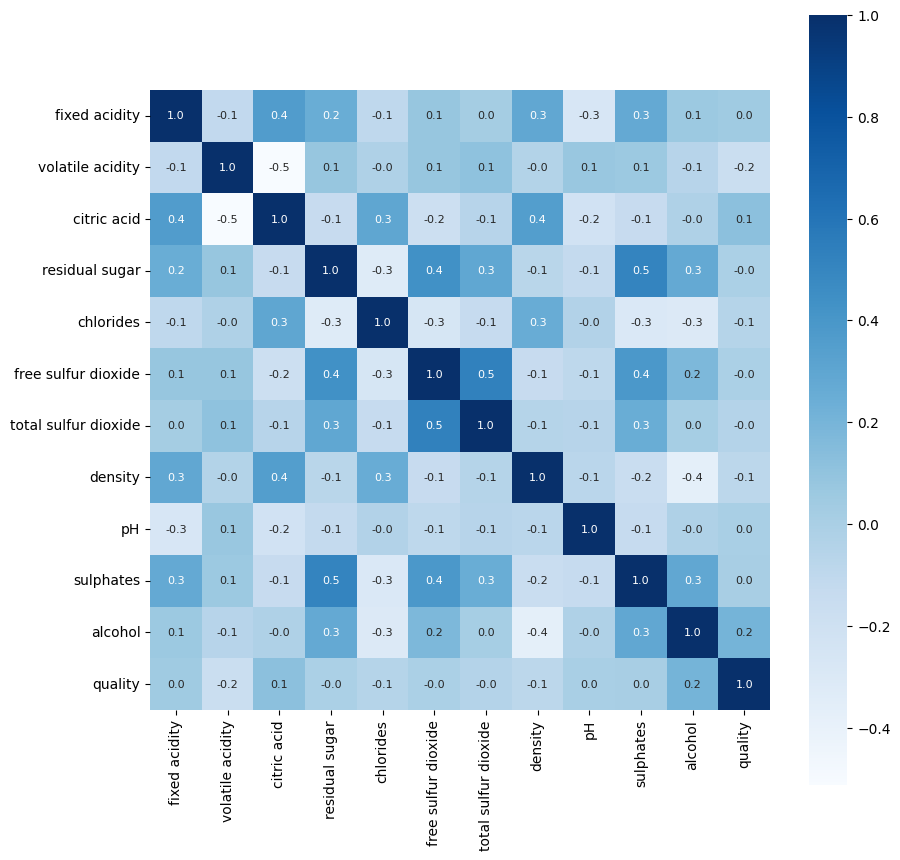

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':8},cmap="Blues",square=True,cbar=True,fmt='.1f')

# Data Splitting
Split the dataset into input features and output labels

In [22]:
x=df.drop('quality',axis=1)
y=df['quality']

# Label Binarization

In [25]:
y=df['quality'].apply(lambda y_val:1 if y_val>=7 else 0)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1994    1
1995    0
1996    1
1997    0
1998    1
Name: quality, Length: 1999, dtype: int64


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model Training
Create the model and train the model using Random Forest Classifier

In [27]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

# Model Evaluation

In [43]:
y_pred=model.predict(x_test)
test_y=accuracy_score(y_pred,y_test)
print("Accuracy",test_y)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error",mse)

Accuracy 0.855
Mean Squared Error 0.145


The model achieved approximately 85% accuracy.

# Model Prediction

In [30]:
def predn(d_in):
  if d_in == 1:
    print("Good Quality Wine")
  else:
    print("Bad Quality Wine")

In [40]:
input_data=(2.5,15.5,1.36,6.1,0.071,17.0,102.0,1.9978,3.35,.8,30.5)
input_data_np=np.asarray(input_data)
input_data_np_reshape=input_data_np.reshape(1,-1)
input_data_df= pd.DataFrame(input_data_np_reshape, columns=x_train.columns)
pred=model.predict(input_data_df)
predn(pred)

Bad Quality Wine
